<a href="https://colab.research.google.com/github/VaideswarReddy/Company_classification/blob/main/Team_5_Company_classification_Vaideswar_Reddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Copy of data_company_classification.csv')

In [ ]:
df.head()

,website,company_name,homepage_text,h1,h2,h3,nav_link_text,meta_keywords,meta_description
0,bipelectric.com,bip dipietro electric inc,Electrici...,NaN,NaN,NaN,NaN,"electricians vero beach, vero beach electrical...","Providing quality, reliable full service resid..."
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...,Offering Bakersfield family medical care from ...,Welcome to ELIAS MEDICAL#sep#Family Medical Pr...,Get To Know Elias Medical#sep#Family Medical P...,NaN,Elias Medical bakersfield ca family doctor med...,For the best value in Bakersfield skin care tr...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...,NaN,Customer Reviews#sep#Welcome to Koops Overhead...,NaN,NaN,"Koops Overhead Doors, Albany Garage Doors, Tro...","Koops Overhead Doors specializes in the sales,..."
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...,NaN,Welcome to our practice!,NaN,NaN,NaN,We would like to welcome you to Midtown Eyecar...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...,NaN,Welcome to REPRO SECURITY Ltd,NaN,NaN,NaN,Repro Security provide a range of tailor made ...


In [ ]:
# df.columns

In [ ]:
df.fillna('null_value',inplace=True)

In [ ]:
# df.homepage_text[0]

In [ ]:
df.meta_keywords[0]

'electricians vero beach, vero beach electrical contractors, electric contractor, electrical contractor, lighting control, lighting solutions, florida electrical, business lighting, electrical contract,\n vero beach electric, commercial lighting control, electrician, Indian River County, Sebastian, Ft Pierce'

In [ ]:
df.meta_description[0]

'Providing quality, reliable full service residential and commercial electrical contractors service in Vero Beach Fl and Indian River County'

In [ ]:
df['complete_text'] = df['homepage_text']+df['meta_keywords']+df['meta_description']

In [ ]:
df['complete_text'][0]

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   website           73974 non-null  object
 1   company_name      73974 non-null  object
 2   homepage_text     73974 non-null  object
 3   h1                73974 non-null  object
 4   h2                73974 non-null  object
 5   h3                73974 non-null  object
 6   nav_link_text     73974 non-null  object
 7   meta_keywords     73974 non-null  object
 8   meta_description  73974 non-null  object
 9   complete_text     73974 non-null  object
dtypes: object(10)
memory usage: 5.6+ MB


In [ ]:
df.columns

Index(['website', 'company_name', 'homepage_text', 'h1', 'h2', 'h3',
       'nav_link_text', 'meta_keywords', 'meta_description', 'complete_text'],
      dtype='object')

In [ ]:
df1 = df[['website','company_name','complete_text']]

In [ ]:
len(df['complete_text'])

73974

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73974 entries, 0 to 73973
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   website        73974 non-null  object
 1   company_name   73974 non-null  object
 2   complete_text  73974 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [ ]:
df1.head()

,website,company_name,complete_text
0,bipelectric.com,bip dipietro electric inc,Electrici...
1,eliasmedical.com,elias medical,site map | en español Elias Medical h...
2,koopsoverheaddoors.com,koops overhead doors,Home About Us Garage Door Repair & Servi...
3,midtowneyes.com,midtown eyecare,918-599-0202 Type Size...
4,reprosecurity.co.uk,repro security ltd,Simply fill out our form below...


In [ ]:
# texts = df1.complete_text[0]

In [ ]:
texts

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
import re

In [ ]:
def remove_urls_punctuations(text):
  text = re.sub(r"(?:\@|http?\://)\S+", "", text)
  text = re.sub(r"(?:\@|https?\://)\S+", "", text)
  text = re.sub(r"[^\w\s]", "", text)
  return text


In [ ]:
remove_urls_punctuations(texts)

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County Florida area for over fifteen years  Locally owned and operated Bip DiPietro Electric is dedicated to providing helpful reliable electrical service to residential commercial and retail clients alike  We are fully licensed and insured and our expert staff of electricians is ready to serve the Vero Beach area any time of the week day or night  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike We believe that the job needs to be done and it needs to be done right All of the employees here at Bip DiPietro Electric strive to give you our client exactly what your plans specify and install them the way that they are meant to be installed   Not only is electricity a necessity these days but it is also a technology that must be treated with caution and respect\xa0 All of the elec

In [ ]:
new_text

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County Florida area for over fifteen years  Locally owned and operated Bip DiPietro Electric is dedicated to providing helpful reliable electrical service to residential commercial and retail clients alike  We are fully licensed and insured and our expert staff of electricians is ready to serve the Vero Beach area any time of the week day or night  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike We believe that the job needs to be done and it needs to be done right All of the employees here at Bip DiPietro Electric strive to give you our client exactly what your plans specify and install them the way that they are meant to be installed   Not only is electricity a necessity these days but it is also a technology that must be treated with caution and respect\xa0 All of the elec

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
def remove_stopwords(text):
  filtered_words = [word for word in text.split() if word not in stopwords.words('english')]
  return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
remove_stopwords(texts)

'Electricians electrical contractors serving Vero Beach FL Indian River County, Florida area fifteen years. Locally owned operated, Bip DiPietro Electric dedicated providing helpful, reliable electrical service residential, commercial retail clients alike. We fully licensed insured, expert staff electricians ready serve Vero Beach area time week, day night. Bip DiPietro Electric full service firm specializing areas Electrical Installation Commercial Residential buildings alike. We believe job needs done needs done right. All employees Bip DiPietro Electric strive give you, client, exactly plans specify install way meant installed. Not electricity necessity days, also technology must treated caution respect. All electricians Bip DiPietro Electric certified know means. No corners cut, items left out. The job done right way all. We would like thank taking time visit Web Site. Feel free look around site please contact us questions company services may provide you. Contact Bip DiPietro Elec

In [ ]:
text_stop

'Electricians electrical contractors serving Vero Beach FL Indian River County Florida area fifteen years Locally owned operated Bip DiPietro Electric dedicated providing helpful reliable electrical service residential commercial retail clients alike We fully licensed insured expert staff electricians ready serve Vero Beach area time week day night Bip DiPietro Electric full service firm specializing areas Electrical Installation Commercial Residential buildings alike We believe job needs done needs done right All employees Bip DiPietro Electric strive give client exactly plans specify install way meant installed Not electricity necessity days also technology must treated caution respect All electricians Bip DiPietro Electric certified know means No corners cut items left The job done right way We would like thank taking time visit Web Site Feel free look around site please contact us questions company services may provide Contact Bip DiPietro Electric Vero Beach Electrical Contractor 

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
def lemmitize_text(text):
  lem_words = []
  for words in text:
    lem_words.append(wnl.lemmatize(words))
  lem_sentence = ''
  for word in lem_words:
    lem_sentence +=  word

  return lem_sentence



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
lemmitize_text(texts)

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
def remove_digits(text):
  for word in text:
    res = ''.join([i for i in text if not i.isdigit()])
  return res

  



In [ ]:
remove_digits(texts)

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
def text_clean(text):
  text = remove_urls_punctuations(text)
  text = remove_stopwords(text)
  # text = remove_digits(text)
  text = lemmitize_text(text)
  return text

In [ ]:
text_clean(texts)

'Electricians electrical contractors serving Vero Beach FL Indian River County Florida area fifteen years Locally owned operated Bip DiPietro Electric dedicated providing helpful reliable electrical service residential commercial retail clients alike We fully licensed insured expert staff electricians ready serve Vero Beach area time week day night Bip DiPietro Electric full service firm specializing areas Electrical Installation Commercial Residential buildings alike We believe job needs done needs done right All employees Bip DiPietro Electric strive give client exactly plans specify install way meant installed Not electricity necessity days also technology must treated caution respect All electricians Bip DiPietro Electric certified know means No corners cut items left The job done right way We would like thank taking time visit Web Site Feel free look around site please contact us questions company services may provide Contact Bip DiPietro Electric Vero Beach Electrical Contractor 

In [ ]:
df1.tail(10)

,website,company_name,complete_text
73964,snbeautybar.com,s&n beauty bar,CONTACT US Submit Thanks for ...
73965,otrbrewerydistrict.org,brewery district community urban redevelopment...,About Purpose History People O...
73966,kiwifoods.com,kiwi foods (i) pvt ltd,"801, 802, KLJ T..."
73967,nutristicks.com,"afterglow beverage company, inc.",Home Products About Me FAQ Contact ...
73968,patagoniafoods.com,patagonia foods,Tog...
73969,nayyarsons.com,nayyarsons food,"Nayyarsons, Deli, Bakery, Food Service..."
73970,claddaghcoffeecafe.com,claddagh coffee,Home About Us Our S...
73971,beautyologist.com.au,beautyologist,03 9531 5092 M...
73972,beautycall.co.uk,beauty call,...
73973,littleladyfoods.com,little lady foods,...


In [ ]:
df1['complete_text'] = df1['complete_text'].apply(text_clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df1.to_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/ML Projects/Company classification/Cleaned_data_company_classification.csv')

In [ ]:
df2

,website,company_name,complete_text
73964,snbeautybar.com,s&n beauty bar,CONTACT US Submit Thanks submitting Send S N ...
73965,otrbrewerydistrict.org,brewery district community urban redevelopment...,About Purpose History People Organization In N...
73966,kiwifoods.com,kiwi foods (i) pvt ltd,KLJ Tower Netaji Subhash Place Pitampura Del...
73967,nutristicks.com,"afterglow beverage company, inc.",Home Products About Me FAQ Contact Think types...
73968,patagoniafoods.com,patagonia foods,Toggle navigation Who We Are Quality Food Safe...
73969,nayyarsons.com,nayyarsons food,Nayyarsons Deli Bakery Food ServicesNayyarsons...
73970,claddaghcoffeecafe.com,claddagh coffee,Home About Us Our Shops West Seventh Wee Shop ...
73971,beautyologist.com.au,beautyologist,Make A Booking Beautyologist Beauty Salon S...
73972,beautycall.co.uk,beauty call,Enquire Get touch Gallery Prices Reviews Ar...
73973,littleladyfoods.com,little lady foods,What Our partners Why choose us Our family Con...


In [ ]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

lem_words = []
for words in filtered_words:
  lem_words.append(wnl.lemmatize(words))
    # print(wnl.lemmatize(words))


# lem_words = wnl.lemmatize(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lem_sentence = ''
for word in lem_words:
  lem_sentence +=  ' ' + word


In [ ]:
lem_sentence

' Electricians electrical contractor serving Vero Beach FL Indian River County Florida area fifteen year Locally owned operated Bip DiPietro Electric dedicated providing helpful reliable electrical service residential commercial retail client alike We fully licensed insured expert staff electrician ready serve Vero Beach area time week day night Bip DiPietro Electric full service firm specializing area Electrical Installation Commercial Residential building alike We believe job need done need done right All employee Bip DiPietro Electric strive give client exactly plan specify install way meant installed Not electricity necessity day also technology must treated caution respect All electrician Bip DiPietro Electric certified know mean No corner cut item left The job done right way We would like thank taking time visit Web Site Feel free look around site please contact u question company service may provide Contact Bip DiPietro Electric Vero Beach Electrical Contractor External Links Di

In [ ]:
lem_words

In [ ]:
filtered_words

In [ ]:
# remove_urls(texts)

'                                     Electricians and electrical contractors serving Vero Beach FL and Indian River County, Florida area for over fifteen years.  Locally owned and operated, Bip DiPietro Electric is dedicated to providing helpful, reliable electrical service to residential, commercial and retail clients alike.  We are fully licensed and insured, and our expert staff of electricians is ready to serve the Vero Beach area any time of the week, day or night.  Bip DiPietro Electric is a full service firm specializing in all areas of Electrical Installation for Commercial and Residential buildings alike. We believe that the job needs to be done and it needs to be done right. All of the employees here at Bip DiPietro Electric strive to give you, our client, exactly what your plans specify and install them the way that they are meant to be installed.   Not only is electricity a necessity these days, but it is also a technology that must be treated with caution and respect.\xa0

In [ ]:
# tokenizer = nltk.RegexpTokenizer(r"\w+")
# new_words = tokenizer.tokenize(texts)

In [ ]:
new_words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
filtered_words = [word for word in new_words if word not in stopwords.words('english')]

In [ ]:
filtered_words

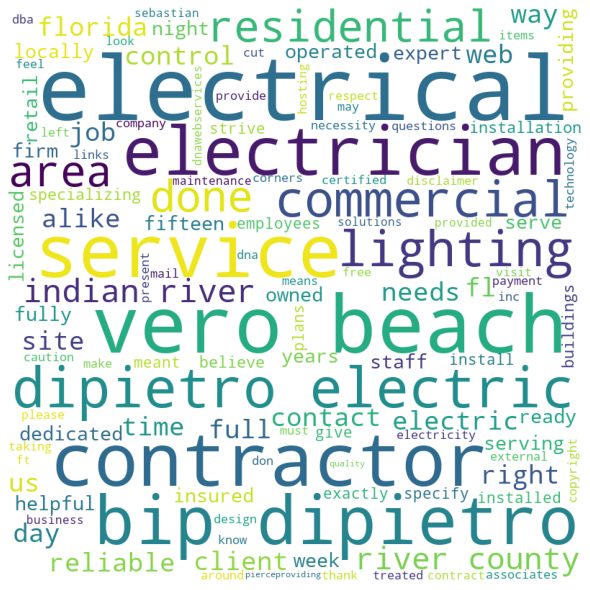

In [ ]:
words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in filtered_words:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
from nltk.stem import PorterStemmer
# e_words= ["wait", "waiting", "waited", "waits"]
ps =PorterStemmer()
for w in filtered_words:
    rootWord=ps.stem(w)
    print(rootWord)

In [ ]:

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
  
# Create WordNetLemmatizer object
wnl = WordNetLemmatizer()

lem_words = []
for words in filtered_words:
  lem_words.append(wnl.lemmatize(words))
    # print(wnl.lemmatize(words))



# lem_words = wnl.lemmatize(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(len(lem_words))
# lem_words

215


In [ ]:
len(set(lem_words))

142

In [ ]:
words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in lem_words:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(lem_words)

In [ ]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features)

112
['2009', 'alike', 'area', 'associates', 'beach', 'believe', 'bip', 'building', 'business', 'caution', 'certified', 'client', 'commercial', 'company', 'contact', 'contract', 'contractor', 'control', 'copyright', 'corner', 'county', 'cut', 'day', 'dba', 'dedicated', 'design', 'dipietro', 'disclaimer', 'dna', 'dnawebservices', 'don', 'electric', 'electrical', 'electrician', 'electricians', 'electricity', 'employee', 'exactly', 'expert', 'external', 'feel', 'firm', 'fl', 'florida', 'free', 'ft', 'fully', 'helpful', 'hosting', 'indian', 'install', 'installation', 'installed', 'insured', 'item', 'job', 'know', 'left', 'licensed', 'lighting', 'like', 'links', 'locally', 'look', 'mail', 'maintenance', 'make', 'mean', 'meant', 'necessity', 'need', 'night', 'operated', 'owned', 'payment', 'pierceproviding', 'plan', 'present', 'provide', 'provided', 'providing', 'quality', 'question', 'ready', 'reliable', 'residential', 'respect', 'retail', 'right', 'river', 'sebastian', 'serve', 'service', '

In [ ]:
print(X)

  (0, 34)	1.0
  (1, 32)	1.0
  (2, 16)	1.0
  (3, 94)	1.0
  (4, 106)	1.0
  (5, 4)	1.0
  (6, 42)	1.0
  (7, 49)	1.0
  (8, 89)	1.0
  (9, 20)	1.0
  (10, 43)	1.0
  (11, 2)	1.0
  (13, 111)	1.0
  (14, 62)	1.0
  (15, 73)	1.0
  (16, 72)	1.0
  (17, 6)	1.0
  (18, 26)	1.0
  (19, 31)	1.0
  (20, 24)	1.0
  (21, 80)	1.0
  (22, 47)	1.0
  (23, 84)	1.0
  (24, 32)	1.0
  (25, 92)	1.0
  :	:
  (189, 31)	1.0
  (190, 12)	1.0
  (191, 59)	1.0
  (192, 17)	1.0
  (193, 33)	1.0
  (194, 49)	1.0
  (195, 89)	1.0
  (196, 20)	1.0
  (197, 90)	1.0
  (198, 45)	1.0
  (199, 75)	1.0
  (200, 81)	1.0
  (201, 84)	1.0
  (203, 92)	1.0
  (204, 85)	1.0
  (205, 12)	1.0
  (206, 32)	1.0
  (207, 16)	1.0
  (208, 92)	1.0
  (209, 106)	1.0
  (210, 4)	1.0
  (211, 42)	1.0
  (212, 49)	1.0
  (213, 89)	1.0
  (214, 20)	1.0


In [ ]:
modelkmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, n_init=100)
modelkmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
word_features = modelkmeans.get_feature_names()
print(len(word_features))
# print(word_features[5000:5100])

AttributeError: ignored

In [ ]:
# -*- coding: utf-8 -*-
''' This program takes a excel sheet as input where each row in first column of sheet represents a document.  '''

import pandas as pd
import numpy as np


# data=pd.read_excel('data.xlsx') #Include your data file instead of data.xlsx
# idea=data.iloc[:,0:1] #Selecting the first column that has text.

#Converting the column of data from excel sheet into a list of documents, where each document corresponds to a group of sentences.
corpus= lem_words
# for index,row in idea.iterrows():
#     corpus.append(row['Idea'])

'''Or you could just comment out the above code and use this dummy corpus list instead if you don't have the data.
corpus=['She went to the airport to see him off.','I prefer reading to writing.','Los Angeles is in California. It's southeast of San Francisco.','I ate a burger then went to bed.','Compare your answer with Tom's.','I had hardly left home when it began to rain heavily.','If he had asked me, I would have given it to him. 
','I could have come by auto, but who would pay the fare? ','Whatever it may be, you should not have beaten him.','You should have told me yesterday','I should have joined this course last year.','Where are you going?','There are too many people here.','Everyone always asks me that.','I didn't think you were going to make it.','Be quiet while I am speaking.','I can't figure out why he said so.'] '''
    
    
#Count Vectoriser then tidf transformer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

#vectorizer.get_feature_names()

#print(X.toarray())     

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )                        

from sklearn.cluster import KMeans

num_clusters = 3 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()

idea={'Idea':corpus, 'Cluster':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Idea','Cluster']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Cluster'].value_counts()) #Print the counts of doc 

(215, 128)


            Idea  Cluster
0   Electricians        0
0     electrical        0
0     contractor        0
0        serving        0
2           Vero        2
..           ...      ...
1          Beach        1
0             Fl        0
0         Indian        0
0          River        0
0         County        0

[215 rows x 2 columns]


0    201
2      7
1      7
Name: Cluster, dtype: int64


In [ ]:
 import nltk

In [ ]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokenizer.tokenize(text)

In [ ]:
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokenizer.tokenize(text)

In [ ]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
tokenizer.tokenize(text)